<a href="https://colab.research.google.com/github/lumagri/Python_to_Data_Science/blob/main/8_DataScience_analises_de_series_temporais/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alucar - Analisando as vendas


In [1]:
import pandas as pd


In [2]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('alucar.csv')

In [4]:
print('Quantidade de linhas e columas:', alucar.shape) 
#Se há 24 registros, significa que há dados referentes a de 2 anos 

Quantidade de linhas e columas: (24, 2)


In [6]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [9]:
#convertendo object em date
alucar['mes'] = pd.to_datetime(alucar['mes']) 
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [10]:
from ast import increment_lineno
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 KB 12.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [11]:
print(sns.__version__)

0.9.0


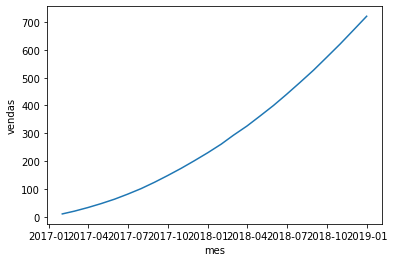

In [12]:
sns.lineplot(x='mes', y='vendas', data= alucar)

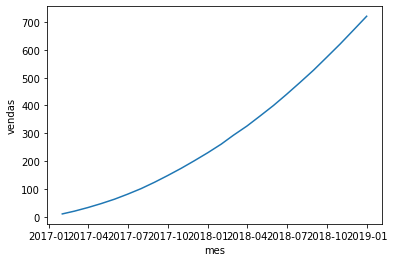

In [14]:
sns.lineplot(x='mes', y='vendas', data= alucar)

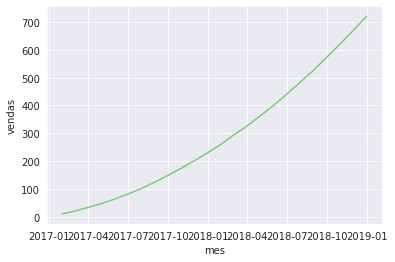

In [17]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
sns.lineplot(x='mes', y='vendas', data= alucar)

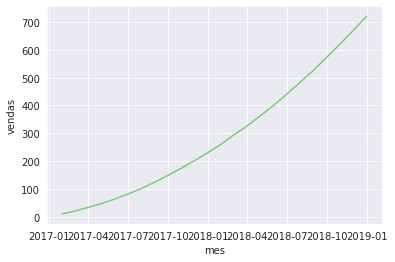

In [18]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data= alucar)


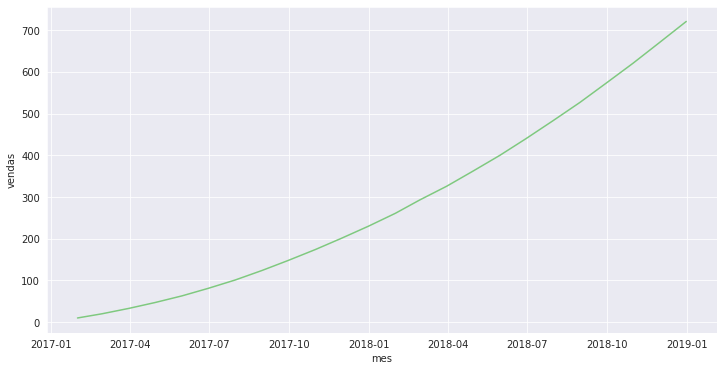

In [20]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data= alucar)
# para retirar o texto que fica acima do gráfico, insira-o em uma variável
ax.figure.set_size_inches(12,6) #para alterar o tamanho do gráfico

Text(0.0, 1.0, 'Vendas Alcar de 2017 e 2018')

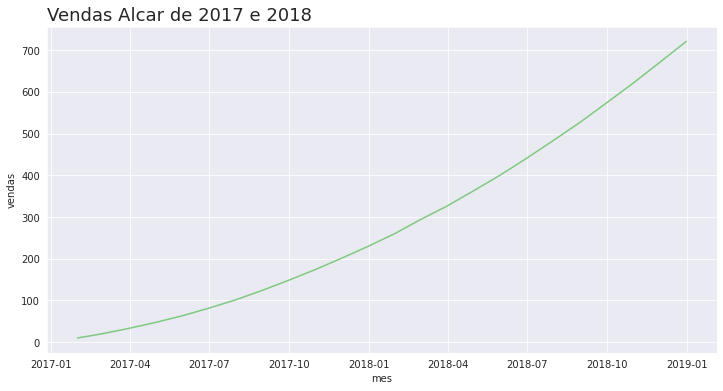

In [22]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data= alucar)
# para retirar o texto que fica acima do gráfico, insira-o em uma variável.
ax.figure.set_size_inches(12,6) #para alterar o tamanho do gráfico.
ax.set_title('Vendas Alcar de 2017 e 2018', loc = 'left', fontsize=18) 
#para inserir o título, centralização e tamanho da fonte.

Text(0, 0.5, 'Vendas (R$)')

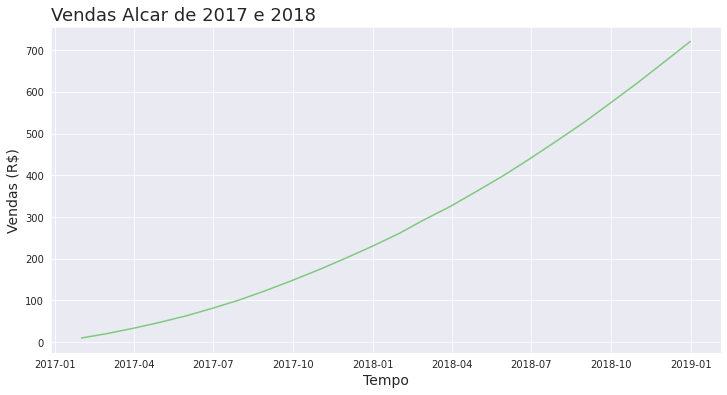

In [23]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data= alucar)
# para retirar o texto que fica acima do gráfico, insira-o em uma variável.
ax.figure.set_size_inches(12,6) #para alterar o tamanho do gráfico.
ax.set_title('Vendas Alcar de 2017 e 2018', loc = 'left', fontsize=18) 
#para inserir o título, centralização e tamanho da fonte.
ax.set_xlabel('Tempo', fontsize=14) #para ajustar o tamanho das label do eixo X
ax.set_ylabel('Vendas (R$)', fontsize=14) #para ajustar o tamanho das label do eixo Y

In [24]:
alucar.head() #quanto aumentou de 1 mês para o outro? 
#mês 2 - mês 1, mês 3 - mês 3 e assim por diante 

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [26]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head() #com a função .diff temos a diferença entres cada mês. 

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


Text(0, 0.5, 'Aumento')

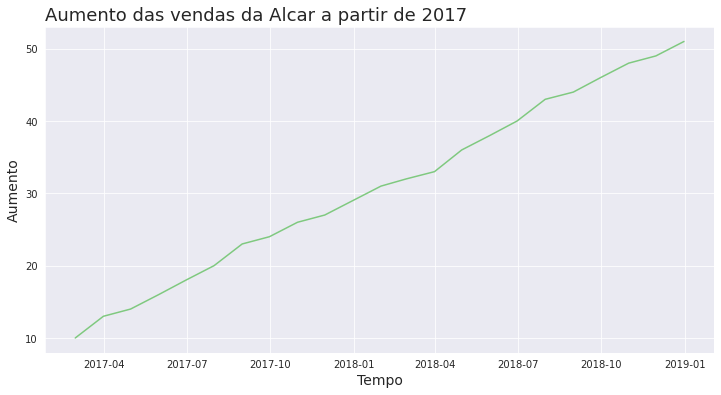

In [29]:
#para apresentar o aumento das vendas. 
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data= alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alcar a partir de 2017', loc = 'left', fontsize=18) 
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)

#para ficar mais fácil de plotar esse gráfico pode-se criar uma função. 

In [30]:
def grafico(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset) # os valores são alterados para receber os valores que forem passados como parâmetro.
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc = 'left', fontsize=18) 
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

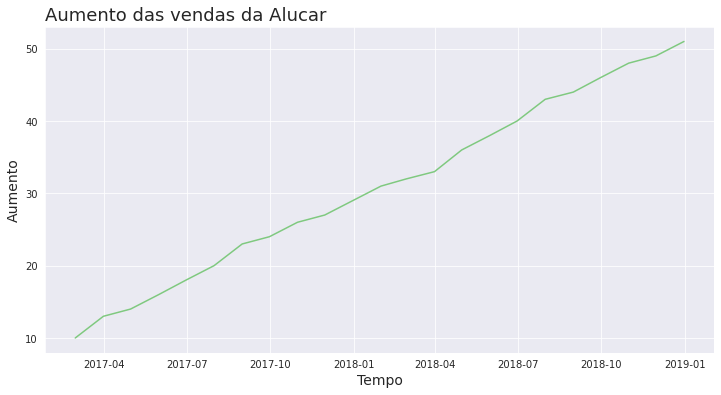

In [32]:
grafico('Aumento das vendas da Alucar', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [34]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


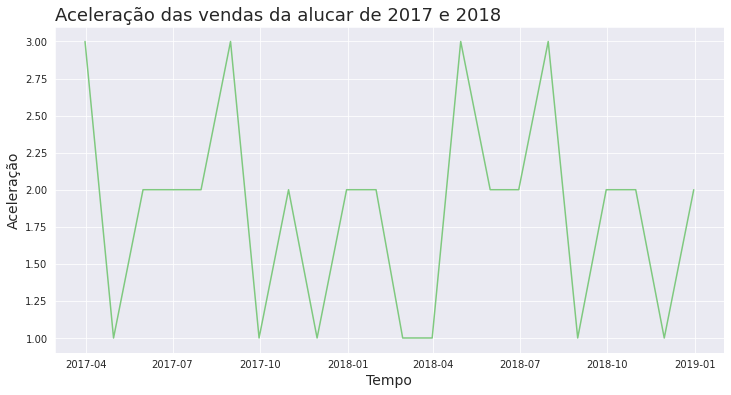

In [36]:
grafico('Aceleração das vendas da alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)